# COVID-19 Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import seaborn as sns
# import plotly.express as px
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')

import itertools
from itertools import islice
import sqlite3

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.mode.chained_assignment = None  
pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)

In [5]:
covid_by_day = pd.read_csv("data/coronavirus-data-master/trends/cases-by-day.csv")

covid_by_day["DateTime"] = pd.to_datetime(covid_by_day["date_of_interest"])

covid_by_day = covid_by_day.set_index("DateTime").filter(like="PROBABLE_CASE_COUNT")
covid_by_day.columns = ["Total_Case_Count", "BX_Case_Count", "BK_Case_Count", "MN_Case_Count", "QN_Case_Count", "SI_Case_Count"]
covid_by_day

,Total_Case_Count,BX_Case_Count,BK_Case_Count,MN_Case_Count,QN_Case_Count,SI_Case_Count
DateTime,,,,,,
2020-02-29,0,0,0,0,0,0
2020-03-01,0,0,0,0,0,0
2020-03-02,0,0,0,0,0,0
2020-03-03,0,0,0,0,0,0
2020-03-04,0,0,0,0,0,0
...,...,...,...,...,...,...
2022-11-29,960,193,219,165,322,61
2022-11-30,843,151,241,121,278,52
2022-12-01,450,80,109,74,157,30


In [6]:
covid_by_day.describe()

,Total_Case_Count,BX_Case_Count,BK_Case_Count,MN_Case_Count,QN_Case_Count,SI_Case_Count
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,480.178394,94.046581,132.459861,89.627354,132.600595,31.375619
std,647.706714,148.586371,181.364396,117.357436,174.498977,36.377330
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,12.000000,26.000000,15.000000,19.000000,5.000000
50%,351.000000,60.000000,98.000000,67.000000,93.000000,23.000000
75%,644.000000,123.000000,168.000000,121.000000,188.000000,46.000000
max,5882.000000,1575.000000,1906.000000,972.000000,1606.000000,316.000000


In [7]:
covid_by_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1009 entries, 2020-02-29 to 2022-12-03
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Total_Case_Count  1009 non-null   int64
 1   BX_Case_Count     1009 non-null   int64
 2   BK_Case_Count     1009 non-null   int64
 3   MN_Case_Count     1009 non-null   int64
 4   QN_Case_Count     1009 non-null   int64
 5   SI_Case_Count     1009 non-null   int64
dtypes: int64(6)
memory usage: 55.2 KB


In [8]:
covid_by_day.isnull().sum()

Total_Case_Count    0
BX_Case_Count       0
BK_Case_Count       0
MN_Case_Count       0
QN_Case_Count       0
SI_Case_Count       0
dtype: int64

In [9]:
print("Maximum Cases in one day:", covid_by_day.max())
print("Minimum Cases in one day:", covid_by_day.min())
print()
print("Start Date:", covid_by_day.index.min())
print("End Date:", covid_by_day.index.max())

Maximum Cases in one day: Total_Case_Count    5882
BX_Case_Count       1575
BK_Case_Count       1906
MN_Case_Count        972
QN_Case_Count       1606
SI_Case_Count        316
dtype: int64
Minimum Cases in one day: Total_Case_Count    0
BX_Case_Count       0
BK_Case_Count       0
MN_Case_Count       0
QN_Case_Count       0
SI_Case_Count       0
dtype: int64

Start Date: 2020-02-29 00:00:00
End Date: 2022-12-03 00:00:00


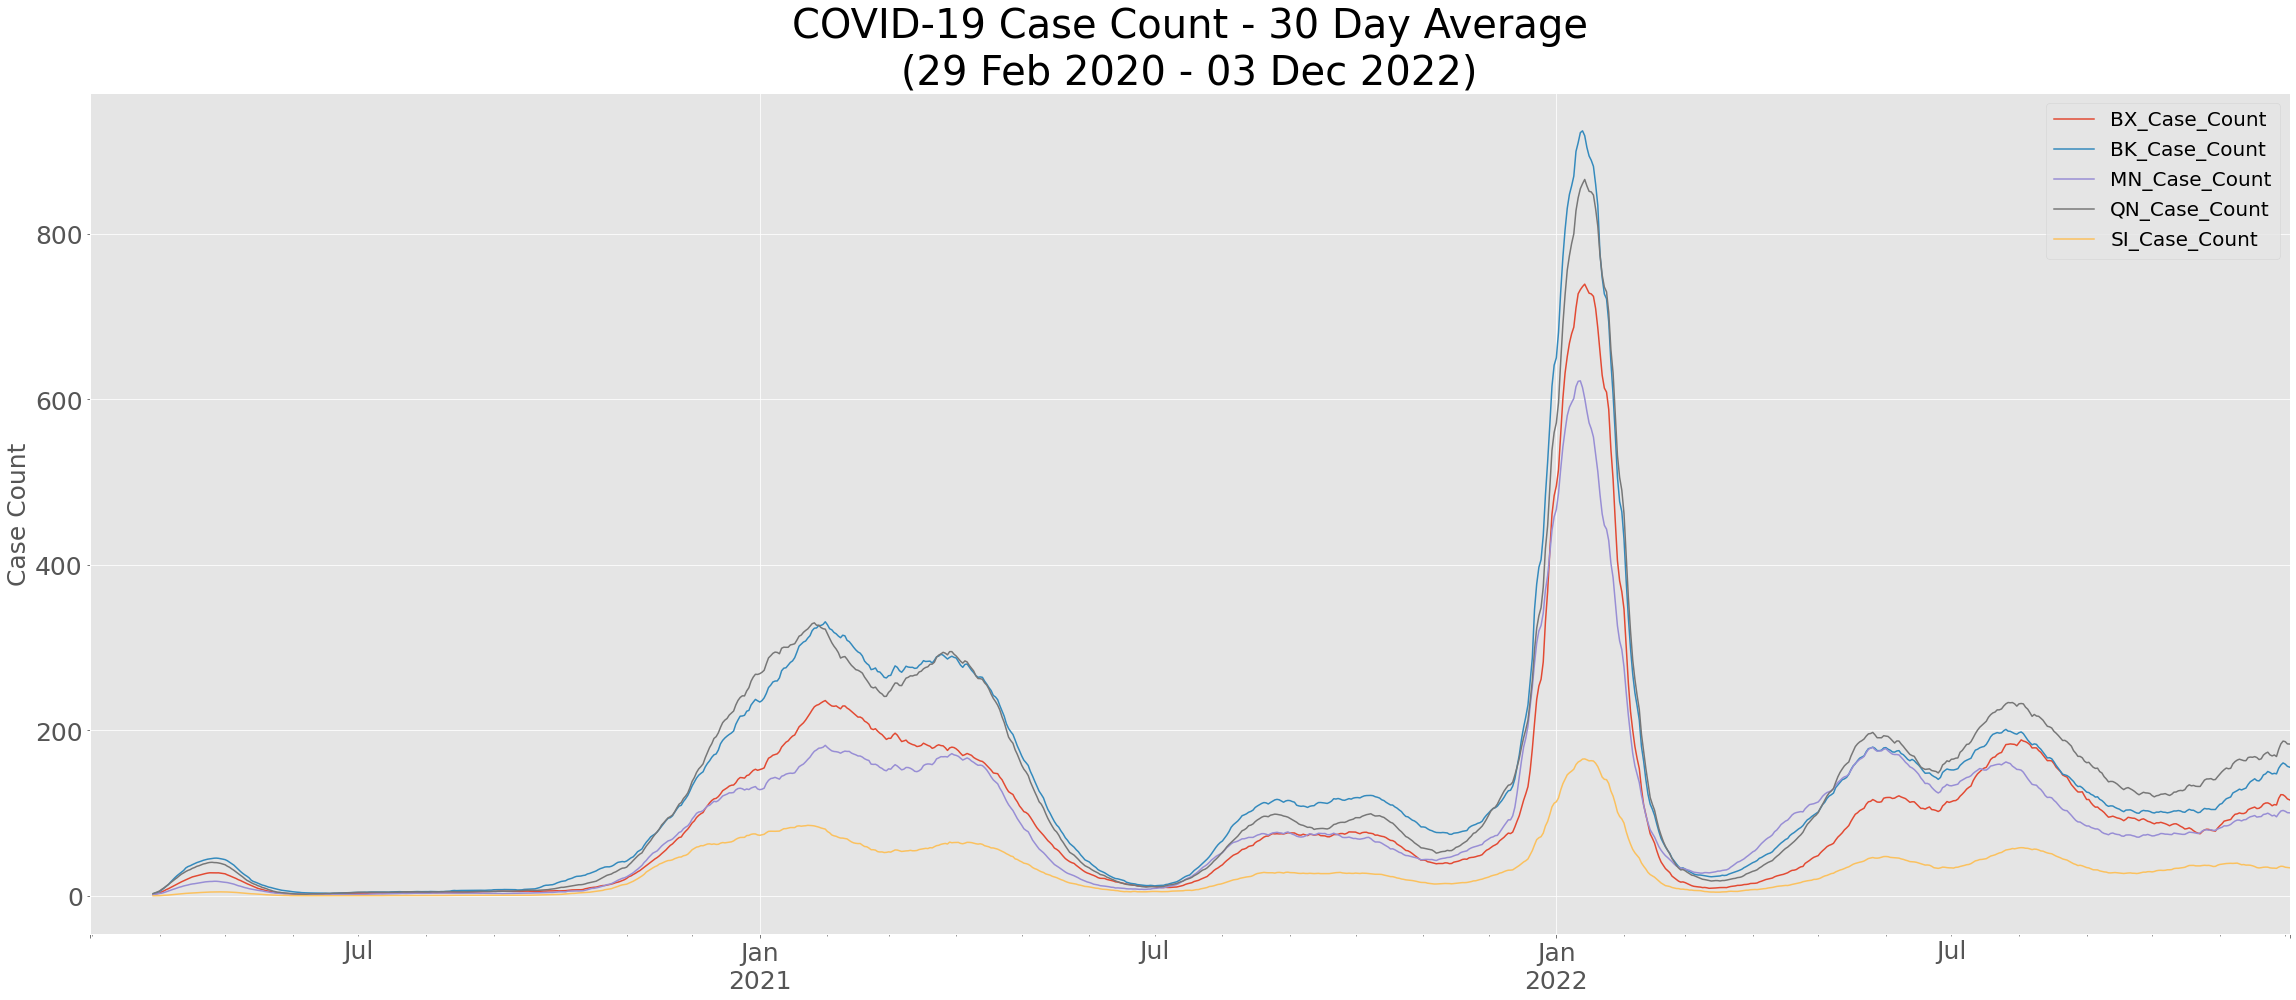

In [12]:
# covid_by_day.rolling(30).mean().plot()
fig, ax = plt.subplots(figsize=(32,14))

covid_by_day.rolling(30).mean().drop("Total_Case_Count", axis=1).plot(kind="line",
                                                                      legend=True,
                                                                      fontsize=25,
                                                                      ax=ax)
ax.set_title("COVID-19 Case Count - 30 Day Average\n(29 Feb 2020 - 03 Dec 2022)",fontsize=40)
ax.set_xlabel("")
ax.set_ylabel("Case Count", fontsize=25)

plt.legend(fontsize=20)
plt.tight_layout()
# plt.savefig("./img/COVID_LineChart.png", dpi=100)
plt.show()